[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ds-reboot/python-first-part/blob/main/notebooks/hometasks/Task2_dmrf_visual.ipynb)

# Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить результаты в pandas dataframe
<hr>

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
-- Привести колонки датафрейма к одному типу данных
-- Проверить индекс, чтобы он соответствовал порядку строк
-- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки
<hr>

* Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
-- Рассчитать объемы вводимого жилья по регионам и по годам.
-- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
-- Визуализировать разброс, связь и распределение этих показателей по регионам
-- Сделать выводы по каждому из расчетов и графиков



# Загрузка библиотек

In [ ]:
!pip install -q xlrd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import plotly.express as px

# Загрузка данных

Воспользуемся файлом Excel, который выгрузили в ДЗ№1

In [ ]:
df = pd.read_excel('df.xlsx')
df

,Unnamed: 0,data.id,data.pdId,data.developer.devId,data.developer.devShortCleanNm,data.developer.devShortNm,data.developer.devFullCleanNm,data.developer.problObjCnt,data.developer.buildObjCnt,data.developer.comissObjCnt,...,data.developer.bankruptStage.bankruptStageDesc,data.developer.bankruptStage.bankruptLawUrl,data.developer.orgBankruptMsgDttm,data.metro.id,data.metro.name,data.metro.line,data.metro.color,data.metro.time,data.metro.isWalk,data.metro.colors
0,0,29679,124647,7424,212-2,212-2,212-2,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,13391,28101,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,13397,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,13383,28105,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,13398,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10586,10586,28073,96446,7344,ЯРКИЙ МИР,ЯРКИЙ МИР,ЯРКИЙ МИР,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10587,10587,28072,96379,7344,ЯРКИЙ МИР,ЯРКИЙ МИР,ЯРКИЙ МИР,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10588,10588,28074,96537,7344,ЯРКИЙ МИР,ЯРКИЙ МИР,ЯРКИЙ МИР,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10589,10589,44447,475093,2538,ЯРОСЛАВЛЬЗАКАЗЧИК,ЯРОСЛАВЛЬЗАКАЗЧИК,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ЯРОСЛАВЛЬЗАКАЗЧИК,0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#1. Рассчет средних цен за квадратный метр по регионам. 

In [ ]:
# Выбор колонок для расчета Регион и средняя цена
df1 = df[['data.developer.regRegionDesc','data.objPriceAvg']]
df1

,data.developer.regRegionDesc,data.objPriceAvg
0,Ростовская область,NaN
1,Тюменская область,55893.0
2,Тюменская область,45523.0
3,Тюменская область,53109.0
4,Тюменская область,47886.0
...,...,...
10586,Московская область,85634.0
10587,Московская область,85610.0
10588,Московская область,85515.0
10589,Ярославская область,69916.0


In [ ]:
# Смотрим наличие NaN
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10591 entries, 0 to 10590
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   data.developer.regRegionDesc  10458 non-null  object 
 1   data.objPriceAvg              7689 non-null   float64
dtypes: float64(1), object(1)
memory usage: 165.6+ KB


In [ ]:
# В данном случае лучше просто удалить все строки с NaN
df1.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
# Теперь пропущенных значений нет
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7603 entries, 1 to 10590
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   data.developer.regRegionDesc  7603 non-null   object 
 1   data.objPriceAvg              7603 non-null   float64
dtypes: float64(1), object(1)
memory usage: 178.2+ KB


In [ ]:
# Сгруппируем средние цены за кв.м по регионам и найдем среднее значение отсортируем по убыванию
df2 = df1.groupby('data.developer.regRegionDesc', as_index=False)\
['data.objPriceAvg'].mean().sort_values(by=['data.objPriceAvg'], ascending=False)
df2

,data.developer.regRegionDesc,data.objPriceAvg
37,Москва город,260753.079727
53,Санкт-Петербург город,158732.173653
56,Сахалинская область,136864.567568
32,Ленинградская область,129088.670588
38,Московская область,125518.550373
...,...,...
26,Костромская область,49764.851064
18,Кабардино-Балкарская Республика,48074.200000
59,Северная Осетия - Алания Республика,44111.090909
14,Дагестан Республика,36204.461538


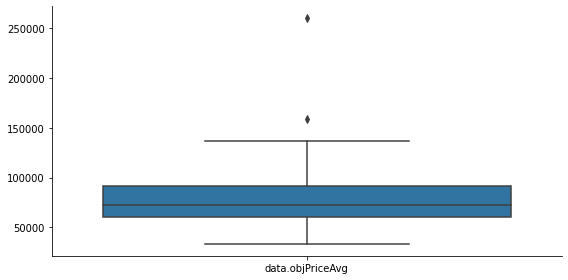

In [ ]:
# Посмотрим на разброс значений
# Основное количество средних значений находится в диапазоне от 50 до 100 тыс. за кв.м.
sns.catplot(
    # x='Item', 
    # y='Sales', 
    data=df2, 
    kind='box', 
    height=4, 
    aspect=2
); 

In [ ]:
# Для пострения графика средних значений установим индексом регион
df2 = df2.set_index('data.developer.regRegionDesc')

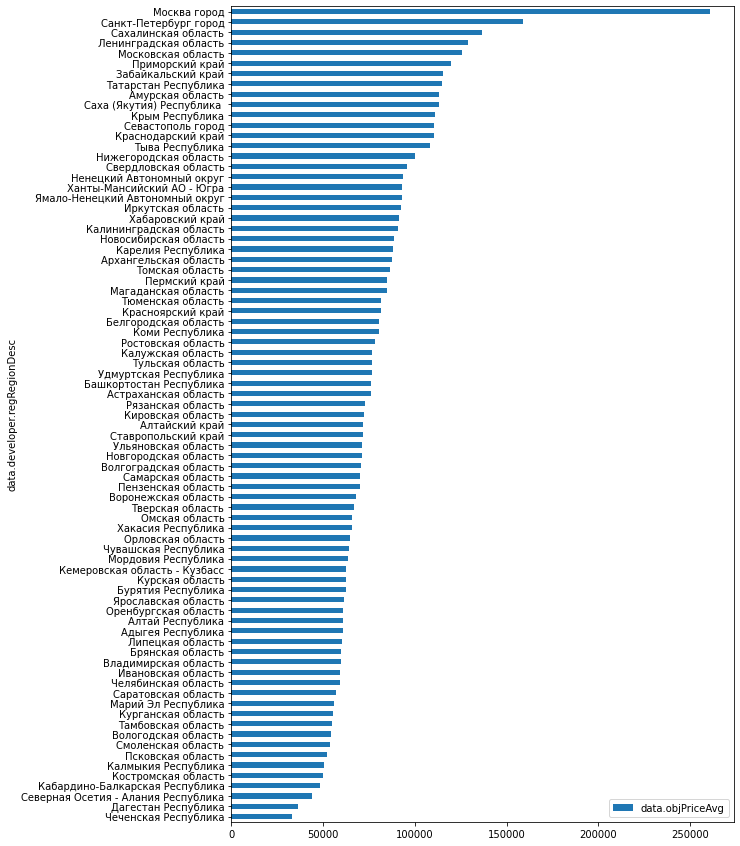

In [ ]:
# Средняя цена кв.м. по регионам
rcParams['figure.figsize'] = 9,15
df2.sort_values(ascending=True,by=['data.objPriceAvg'],).plot(kind='barh')
plt.show()

#2.Рассчет объема вводимого жилья по регионам и по годам.

In [ ]:
# Выберем из таблицы необходимые данные - регион, дата ввода жилья, площадь жилья
df3 = df[['data.developer.regRegionDesc','data.objReady100PercDt', 'data.objFlatSq']]
df3

,data.developer.regRegionDesc,data.objReady100PercDt,data.objFlatSq
0,Ростовская область,2020-03-31,1519.00
1,Тюменская область,2022-12-31,4297.44
2,Тюменская область,2024-12-31,6248.51
3,Тюменская область,2022-12-31,6293.78
4,Тюменская область,2024-12-31,4812.98
...,...,...,...
10586,Московская область,2024-06-30,14872.80
10587,Московская область,2024-06-30,14788.80
10588,Московская область,2023-06-30,29743.20
10589,Ярославская область,2022-12-31,6764.22


In [ ]:
# Что с NaN?
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10591 entries, 0 to 10590
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   data.developer.regRegionDesc  10458 non-null  object 
 1   data.objReady100PercDt        10591 non-null  object 
 2   data.objFlatSq                10591 non-null  float64
dtypes: float64(1), object(2)
memory usage: 248.4+ KB


In [ ]:
# можно убрать все строки с Nan, так как без названия региона они нам не нужны
df3.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
# расчет объем вводимого жилья по регионам, сгруппируем данные
df4 = df3.groupby('data.developer.regRegionDesc', as_index=False)\
['data.objFlatSq'].sum().sort_values(by=['data.objFlatSq'], ascending=False)
df4


,data.developer.regRegionDesc,data.objFlatSq
39,Москва город,18950926.36
55,Санкт-Петербург город,9078139.72
29,Краснодарский край,8581491.89
40,Московская область,8238327.97
59,Свердловская область,3875048.74
...,...,...
69,Тыва Республика,33186.76
23,Карачаево-Черкесская Республика,12659.00
36,Магаданская область,3171.20
41,Ненецкий Автономный округ,2255.71


In [ ]:
df4 = df4.set_index('data.developer.regRegionDesc')

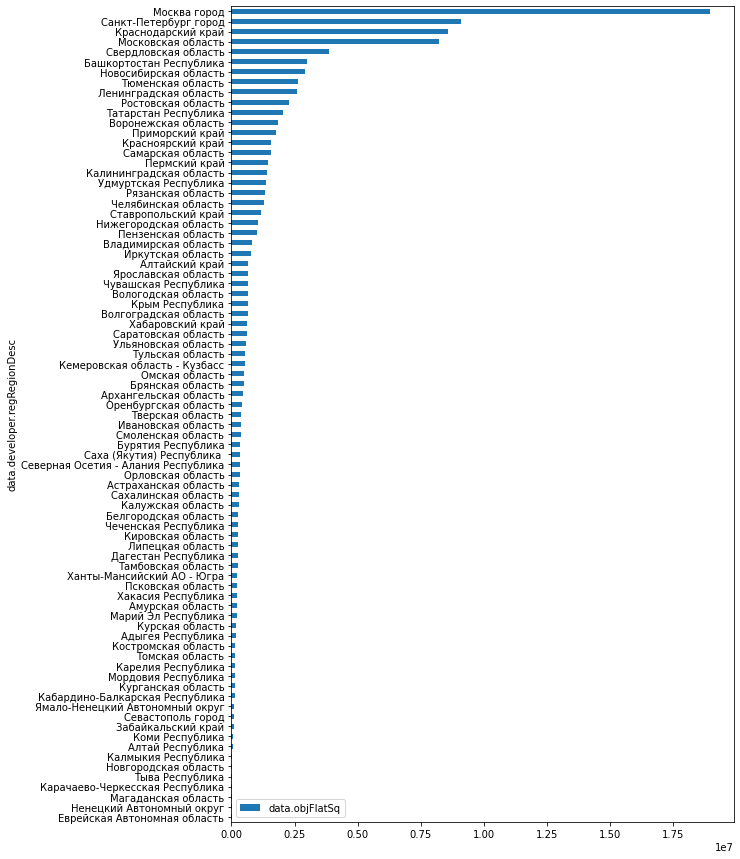

In [ ]:
# Объем вводимого жилья по регионам - в лидерах Москва, МО, СПб, Краснодарский кр.
rcParams['figure.figsize'] = 9,15
df4.sort_values(ascending=True,by=['data.objFlatSq'],).plot(kind='barh')
plt.show()

In [ ]:
# чтобы посчитать объем вводимого жилья по годам, добавим доп.колонку "год"
df3['year'] = pd.DatetimeIndex(df3['data.objReady100PercDt']).year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df3.head()

,data.developer.regRegionDesc,data.objReady100PercDt,data.objFlatSq,year
0,Ростовская область,2020-03-31,1519.00,2020
1,Тюменская область,2022-12-31,4297.44,2022
2,Тюменская область,2024-12-31,6248.51,2024
3,Тюменская область,2022-12-31,6293.78,2022
4,Тюменская область,2024-12-31,4812.98,2024


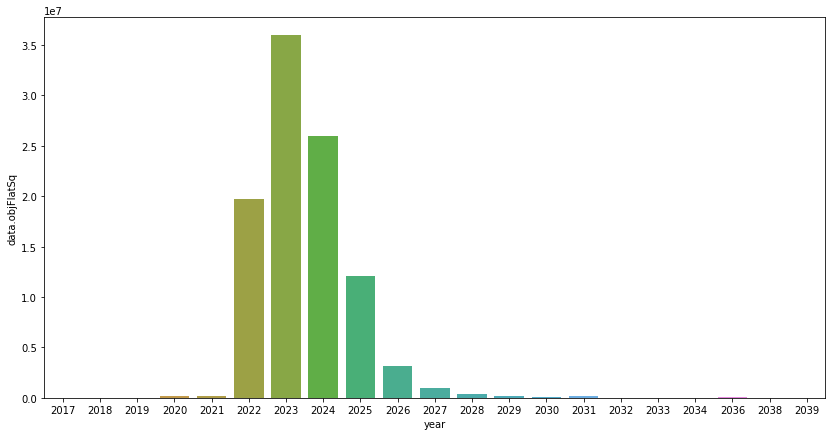

In [ ]:
# Объем вводимого жилья по годам (конечно данный график не отражает реальной картины)
# так как построен на данных только сайта наш дом.рф, по которому основной
# объем запланирован на 2023 год
rcParams['figure.figsize'] = 14,7
sns.barplot(data=df3.groupby('year', as_index=False)\
            ['data.objFlatSq'].sum(), x="year",
            y="data.objFlatSq")

#3.Сравнение этажности домов, количества квартир, жилой площади, количества парковочных мест и цены за квадратный метр в разных регионах

In [ ]:
# Выбираем нужные данные - этажность домов, кол-во квартир, жилая площадь, кол-во
# парковок, цена за кв.м., регион
df5 = df[['data.developer.regRegionDesc','data.objPriceAvg',
          'data.objElemLivingCnt', 'data.objSquareLiving',
          'data.objElemParkingCnt', 'data.objFloorCnt']]
df5

,data.developer.regRegionDesc,data.objPriceAvg,data.objElemLivingCnt,data.objSquareLiving,data.objElemParkingCnt,data.objFloorCnt
0,Ростовская область,NaN,18,1519.00,0,NaN
1,Тюменская область,55893.0,44,4297.44,41,12.0
2,Тюменская область,45523.0,65,6248.51,0,12.0
3,Тюменская область,53109.0,68,6293.78,31,20.0
4,Тюменская область,47886.0,43,4812.98,0,10.0
...,...,...,...,...,...,...
10586,Московская область,85634.0,312,14872.80,0,26.0
10587,Московская область,85610.0,312,14788.80,0,26.0
10588,Московская область,85515.0,600,29743.20,0,26.0
10589,Ярославская область,69916.0,127,6764.22,0,6.0


In [ ]:
# что с Nan?
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10591 entries, 0 to 10590
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   data.developer.regRegionDesc  10458 non-null  object 
 1   data.objPriceAvg              7689 non-null   float64
 2   data.objElemLivingCnt         10591 non-null  int64  
 3   data.objSquareLiving          10591 non-null  float64
 4   data.objElemParkingCnt        10591 non-null  int64  
 5   data.objFloorCnt              10590 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 496.6+ KB


In [ ]:
# По регионам оставляем только  строки без NaN 
df5 = df5[df5['data.developer.regRegionDesc'].notna()]

In [ ]:
# Находим по регионам общее количество (сумму) по квартирам, мест паркинга, жилой площади
df5.groupby('data.developer.regRegionDesc', as_index=False)\
['data.objElemLivingCnt', 'data.objElemParkingCnt','data.objSquareLiving'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,data.developer.regRegionDesc,data.objElemLivingCnt,data.objElemParkingCnt,data.objSquareLiving
0,Адыгея Республика,3444,956,163297.79
1,Алтай Республика,947,68,48379.05
2,Алтайский край,13448,1979,674824.81
3,Амурская область,4035,0,207282.83
4,Архангельская область,10174,579,450917.54
...,...,...,...,...
76,Челябинская область,25831,1263,1296461.53
77,Чеченская Республика,3434,103,254907.92
78,Чувашская Республика,11662,1336,651161.16
79,Ямало-Ненецкий Автономный округ,2391,0,115399.30


In [ ]:
# Сохраним в отдельный датафрейм и установим индекс - регион
df6 = df5.groupby('data.developer.regRegionDesc', as_index=False)\
['data.objElemLivingCnt', 'data.objElemParkingCnt','data.objSquareLiving'].sum()
df6 = df6.set_index('data.developer.regRegionDesc')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Посчитаем среднюю этажность по регионам (удалив одну строку с NaN)
df5 = df5[df5['data.objFloorCnt'].notna()]
df5.groupby('data.developer.regRegionDesc', as_index=False)\
['data.objFloorCnt'].mean()

,data.developer.regRegionDesc,data.objFloorCnt
0,Адыгея Республика,7.875000
1,Алтай Республика,11.272727
2,Алтайский край,12.908046
3,Амурская область,12.857143
4,Архангельская область,9.859375
...,...,...
76,Челябинская область,11.123596
77,Чеченская Республика,20.153846
78,Чувашская Республика,12.794521
79,Ямало-Ненецкий Автономный округ,7.185185


In [ ]:
# Тоже сохраним в отдельный DF, установив индекс - Регион
df_floor_mean = df5.groupby('data.developer.regRegionDesc', as_index=False)\
['data.objFloorCnt'].mean()
df_floor_mean = df_floor_mean.set_index('data.developer.regRegionDesc')

In [ ]:
# соединим  таблицы: квартиры+паркинги+площадь, средн.этажность и средняя цена кв.м.(возьмем ее из п.1)
pd.concat([df6,df_floor_mean, df2], axis=1) 

,data.objElemLivingCnt,data.objElemParkingCnt,data.objSquareLiving,data.objFloorCnt,data.objPriceAvg
data.developer.regRegionDesc,,,,,
Адыгея Республика,3444,956,163297.79,7.875000,60558.050000
Алтай Республика,947,68,48379.05,11.272727,60576.545455
Алтайский край,13448,1979,674824.81,12.908046,71817.933333
Амурская область,4035,0,207282.83,12.857143,113224.739130
Архангельская область,10174,579,450917.54,9.859375,87739.207547
...,...,...,...,...,...
Челябинская область,25831,1263,1296461.53,11.123596,59040.200000
Чеченская Республика,3434,103,254907.92,20.153846,32742.333333
Чувашская Республика,11662,1336,651161.16,12.794521,64046.951613


In [ ]:
# сохраним в отдельный df
df_un = pd.concat([df6,df_floor_mean, df2], axis=1)

In [ ]:
# По средней цене в двух регионах - NaN
df_un.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, Адыгея Республика to Ярославская область
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data.objElemLivingCnt   81 non-null     int64  
 1   data.objElemParkingCnt  81 non-null     int64  
 2   data.objSquareLiving    81 non-null     float64
 3   data.objFloorCnt        81 non-null     float64
 4   data.objPriceAvg        79 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.8+ KB


In [ ]:
# Посмотрим какие это регионы
df_un[df_un.isna().any(axis=1)]

,data.objElemLivingCnt,data.objElemParkingCnt,data.objSquareLiving,data.objFloorCnt,data.objPriceAvg
data.developer.regRegionDesc,,,,,
Еврейская Автономная область,50,0,2145.95,6.0,NaN
Карачаево-Черкесская Республика,196,0,12659.00,15.0,NaN


In [ ]:
# Введем индекс для отрисовки графиков
df_un.reset_index(inplace=True)

In [ ]:
# Посмотрим на среднюю этажность по регионам (разброс от 5 до 20 этажей)
data = df_un
fig = px.bar(data, x='data.objFloorCnt', y='data.developer.regRegionDesc', orientation='h')
fig.update_layout(
    autosize=False,
    width=800,
    height=1500,)


In [ ]:
# Посмотрим на количество квартир в новостройках по регионам - лидеры Москва и МО, Краснодар. кр, СПб
data = df_un
fig = px.bar(data, x='data.objElemLivingCnt', y='data.developer.regRegionDesc',
             orientation='h')
fig.update_layout(
    autosize=False,
    width=800,
    height=1500,)

In [ ]:
# Посмотрим на общую сумму жилой площади в новостройках, лидеры те же регионы
data = df_un
fig = px.bar(data, x='data.objSquareLiving', y='data.developer.regRegionDesc',
             orientation='h')
fig.update_layout(
    autosize=False,
    width=800,
    height=1500,)

In [ ]:
# Посторим на общее количество парковочных мест по регионах (наибольшее количество Москва и МО, СПб, Краснодарский кр.)
data = df_un
fig = px.bar(data, x='data.objElemParkingCnt', y='data.developer.regRegionDesc',
             orientation='h')
fig.update_layout(
    autosize=False,
    width=800,
    height=1500,)

In [ ]:
# Еще один график по средней цене за кв. м. по регионам
data = df_un
fig = px.bar(data, x='data.objPriceAvg', y='data.developer.regRegionDesc',
             orientation='h')
fig.update_layout(
    autosize=False,
    width=800,
    height=1500,)

## ВЫВОД: Регионы -лидеры по строительству жилья: Москва и МО, СПб, Краснодарский кр., при этом наиболее высокие цены за кв.м. отмечаются в Москве и СПб